In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
print(X.head())
print("\nDependent Feature (y):\n", y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dependent Feature (y):
 0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


In [3]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Standardized X_train (first 5 rows):\n", X_train_scaled[:5])
print("\nOne-hot encoded y_train (first 5 rows):\n", y_train_one_hot[:5])

Standardized X_train (first 5 rows):
 [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]

One-hot encoded y_train (first 5 rows):
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(8, activation='tanh', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(16, activation='tanh'),  # First hidden layer
    Dense(16, activation='tanh'),  # Second hidden layer
    Dense(8, activation='relu'),   # Third hidden layer
    Dense(3, activation='softmax')  # Output layer (3 classes)
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_one_hot, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot))
loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/200
4/4 [==============================] - 2s 81ms/step - loss: 1.3140 - accuracy: 0.1667 - val_loss: 1.3320 - val_accuracy: 0.1333
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 1.2419 - accuracy: 0.1833 - val_loss: 1.2558 - val_accuracy: 0.1667
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 1.1783 - accuracy: 0.2167 - val_loss: 1.1871 - val_accuracy: 0.2333
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1155 - accuracy: 0.3167 - val_loss: 1.1269 - val_accuracy: 0.3333
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 1.0639 - accuracy: 0.3750 - val_loss: 1.0736 - val_accuracy: 0.3333
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 1.0151 - accuracy: 0.4167 - val_loss: 1.0238 - val_accuracy: 0.4667
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.9703 - accuracy: 0.5083 - val_loss: 0.9737 - val_accuracy: 0.5667
Epoch 8/200
4/4 [===

In [5]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


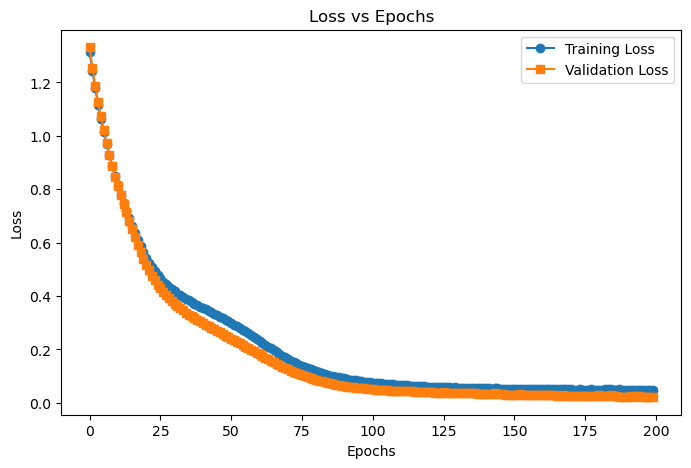

In [6]:
import matplotlib.pyplot as plt

def plot_loss(history, title):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()

plot_loss(history, "Loss vs Epochs")
plt.show()  # Call plt.show() outside the function


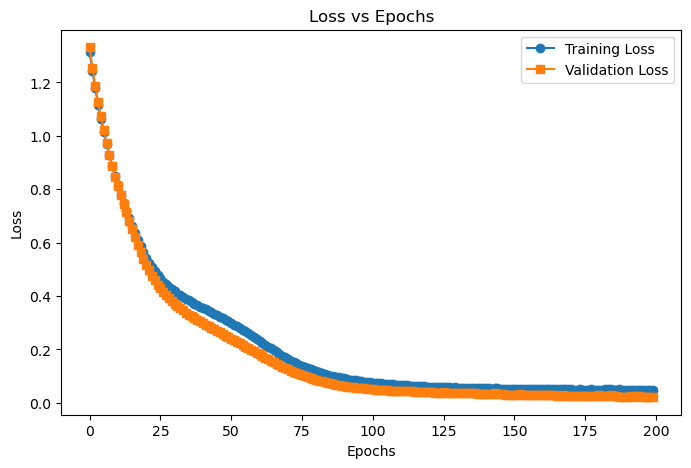

In [7]:
import matplotlib.pyplot as plt

def plot_loss(history, title):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()

plot_loss(history, "Loss vs Epochs")
plt.show()  # Call plt.show() outside the function


Epoch 1/200
4/4 [==============================] - 2s 205ms/step - loss: 2.2384 - accuracy: 0.6583 - val_loss: 2.1374 - val_accuracy: 0.7000
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 2.1924 - accuracy: 0.6583 - val_loss: 2.0950 - val_accuracy: 0.7000
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 2.1509 - accuracy: 0.6750 - val_loss: 2.0588 - val_accuracy: 0.7000
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 2.1136 - accuracy: 0.6750 - val_loss: 2.0258 - val_accuracy: 0.7000
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 2.0794 - accuracy: 0.6833 - val_loss: 1.9941 - val_accuracy: 0.7000
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 2.0450 - accuracy: 0.6833 - val_loss: 1.9630 - val_accuracy: 0.7000
Epoch 7/200
4/4 [==============================] - 0s 15ms/step - loss: 2.0141 - accuracy: 0.6833 - val_loss: 1.9327 - val_accuracy: 0.7000
Epoch 8/200
4/4 [==

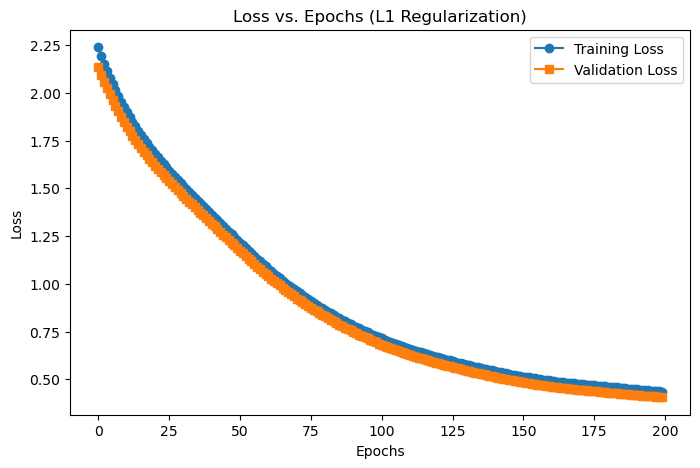

In [8]:
from tensorflow.keras.regularizers import l1

# Build NN with L1 Regularization
model_L1 = Sequential([
    Dense(8, activation='tanh', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l1(0.01)),
    Dense(16, activation='tanh', kernel_regularizer=l1(0.01)),
    Dense(16, activation='tanh', kernel_regularizer=l1(0.01)),
    Dense(8, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(3, activation='softmax')
])

# Compile and train the model
model_L1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_L1 = model_L1.fit(X_train_scaled, y_train_one_hot, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot))

# Evaluate
loss_L1, accuracy_L1 = model_L1.evaluate(X_test_scaled, y_test_one_hot)
print(f"L1 Regularization - Test Loss: {loss_L1:.4f}")
print(f"L1 Regularization - Test Accuracy: {accuracy_L1:.4f}")

# Plot loss
plot_loss(history_L1, "Loss vs. Epochs (L1 Regularization)")


Epoch 1/200
4/4 [==============================] - 1s 83ms/step - loss: 1.4675 - accuracy: 0.4750 - val_loss: 1.4481 - val_accuracy: 0.5000
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 1.4210 - accuracy: 0.4917 - val_loss: 1.4040 - val_accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 1.3809 - accuracy: 0.4917 - val_loss: 1.3578 - val_accuracy: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 1.3415 - accuracy: 0.5000 - val_loss: 1.3139 - val_accuracy: 0.4667
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 1.3038 - accuracy: 0.5083 - val_loss: 1.2676 - val_accuracy: 0.4667
Epoch 6/200
4/4 [==============================] - 0s 14ms/step - loss: 1.2664 - accuracy: 0.5083 - val_loss: 1.2236 - val_accuracy: 0.5000
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 1.2310 - accuracy: 0.5083 - val_loss: 1.1830 - val_accuracy: 0.5000
Epoch 8/200
4/4 [===

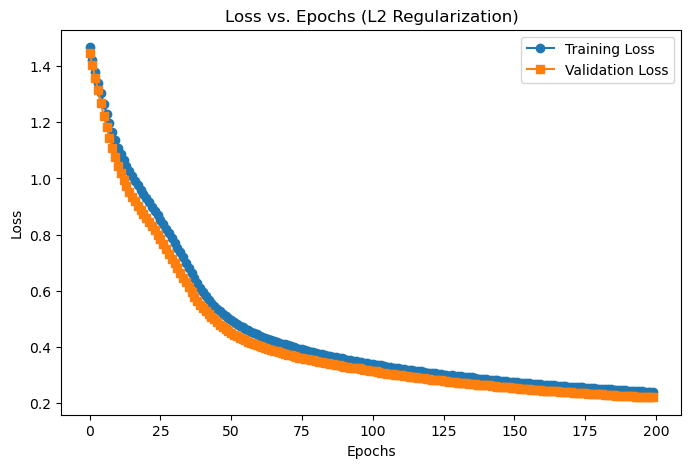

In [9]:
from tensorflow.keras.regularizers import l2

# Build NN with L2 Regularization
model_L2 = Sequential([
    Dense(8, activation='tanh', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(16, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(16, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(3, activation='softmax')
])

# Compile and train the model
model_L2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_L2 = model_L2.fit(X_train_scaled, y_train_one_hot, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot))

# Evaluate
loss_L2, accuracy_L2 = model_L2.evaluate(X_test_scaled, y_test_one_hot)
print(f"L2 Regularization - Test Loss: {loss_L2:.4f}")
print(f"L2 Regularization - Test Accuracy: {accuracy_L2:.4f}")

# Plot loss
plot_loss(history_L2, "Loss vs. Epochs (L2 Regularization)")


Epoch 1/200
4/4 [==============================] - 1s 77ms/step - loss: 1.2714 - accuracy: 0.3333 - val_loss: 1.2092 - val_accuracy: 0.4667
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1662 - accuracy: 0.3417 - val_loss: 1.1553 - val_accuracy: 0.4667
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 1.1257 - accuracy: 0.4083 - val_loss: 1.1014 - val_accuracy: 0.5333
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 1.0990 - accuracy: 0.4583 - val_loss: 1.0461 - val_accuracy: 0.5667
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0793 - accuracy: 0.4500 - val_loss: 0.9960 - val_accuracy: 0.5667
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 1.0140 - accuracy: 0.5417 - val_loss: 0.9487 - val_accuracy: 0.6333
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.9534 - accuracy: 0.5667 - val_loss: 0.9021 - val_accuracy: 0.8333
Epoch 8/200
4/4 [===

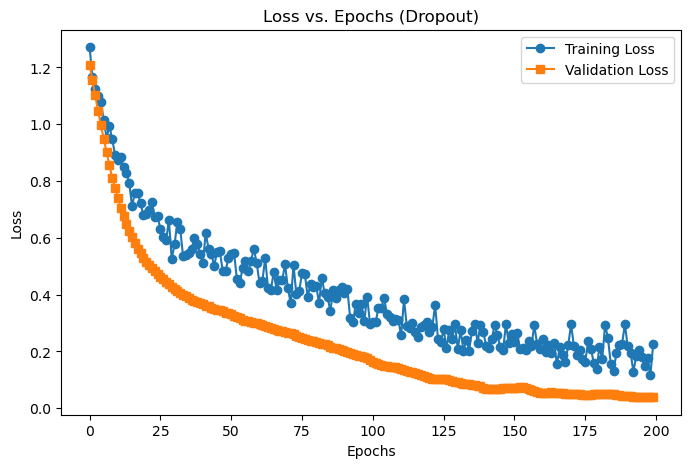

In [10]:
from tensorflow.keras.layers import Dropout

# Build NN with Dropout (20%)
model_dropout = Sequential([
    Dense(8, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='tanh'),
    Dropout(0.2),
    Dense(16, activation='tanh'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile and train the model
model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train_scaled, y_train_one_hot, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot))

# Evaluate
loss_dropout, accuracy_dropout = model_dropout.evaluate(X_test_scaled, y_test_one_hot)
print(f"Dropout - Test Loss: {loss_dropout:.4f}")
print(f"Dropout - Test Accuracy: {accuracy_dropout:.4f}")

# Plot loss
plot_loss(history_dropout, "Loss vs. Epochs (Dropout)")


In [11]:
import numpy as np

# Randomly initialize weights and bias
w_0 = np.random.randn()
b_0 = np.random.randn()

print(f"Randomly initialized weight (w_0): {w_0:.4f}")
print(f"Randomly initialized bias (b_0): {b_0:.4f}")


Randomly initialized weight (w_0): -0.2614
Randomly initialized bias (b_0): 0.8536


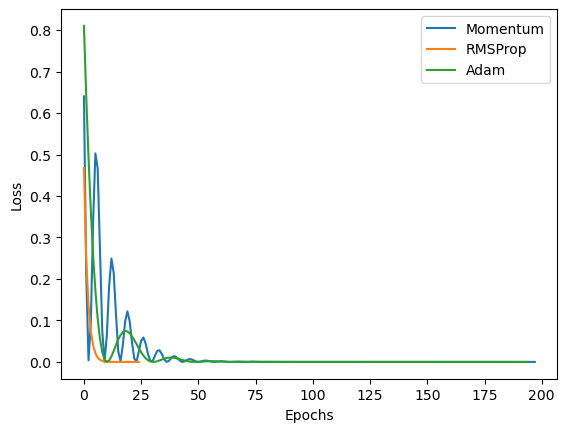

Momentum Converged in 198 iterations
RMSProp Converged in 25 iterations
Adam Converged in 195 iterations


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function and gradient
def loss(m):
    return m**2 - 2*m + 1

def gradient(m):
    return 2*m - 2

# Optimizer function
def optimize(method, lr=0.1, beta1=0.9, beta2=0.999, eps=1e-8):
    m, v, s, t = 0, 0, 0, 1
    history = []
    while True:
        grad = gradient(m) 
        if method == 'Momentum':
            v = beta1 * v + lr * grad
            new_m = m - v
        elif method == 'RMSProp':
            s = beta1 * s + (1 - beta1) * grad**2
            new_m = m - (lr / (np.sqrt(s) + eps)) * grad
        elif method == 'Adam':
            v = beta1 * v + (1 - beta1) * grad
            s = beta2 * s + (1 - beta2) * grad**2
            v_corr = v / (1 - beta1**t)
            s_corr = s / (1 - beta2**t)
            new_m = m - (lr / (np.sqrt(s_corr) + eps)) * v_corr
        history.append(loss(new_m))
        if abs(new_m - m) < 1e-6:
            break
        m, t = new_m, t + 1
    return history, t

# Run optimizers
methods = ['Momentum', 'RMSProp', 'Adam']
results = {method: optimize(method) for method in methods}

# Plot results
plt.figure()
for method, (history, _) in results.items():
    plt.plot(history, label=method)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print iterations
for method, (_, iterations) in results.items():
    print(f"{method} Converged in {iterations} iterations")
